In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('u.data', sep='\t', names=['user_id','item_id', 'rating','timestamp'])

In [87]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [88]:
#convert the strings into number ::::::::::::: CONVERT ENCODING
#importing movie_titles and joining with our main data
movie_titles = pd.read_csv('Movie_Titles.csv', encoding= 'unicode_escape')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [89]:
data= pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [90]:
data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [91]:
ratings['Number_of_ratings']=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['Number_of_ratings']=sorted(data.groupby('title')['rating'].count())
ratings


,rating,Number_of_ratings
title,,
'Til There Was You (1997),2.333333,1
1-900 (1994),2.600000,1
101 Dalmatians (1996),2.908257,1
12 Angry Men (1957),4.344000,1
187 (1997),3.024390,1
...,...,...
Young Guns (1988),3.207921,485
Young Guns II (1990),2.772727,507
"Young Poisoner's Handbook, The (1995)",3.341463,508


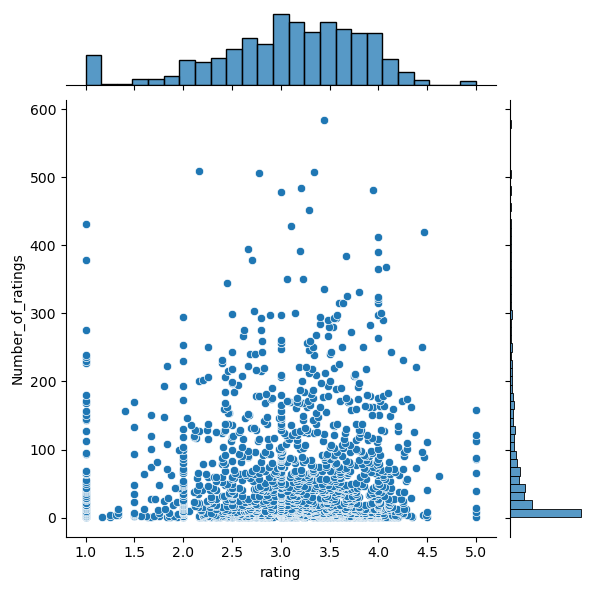

In [92]:
#plot the distribution
sns.jointplot(x='rating', y = 'Number_of_ratings', data= ratings)

In [93]:
movie_matrix=data.pivot_table(index='user_id',columns='title',values='rating' )
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
ratings.sort_values('Number_of_ratings',ascending = False ).head(100) #to get the highest number of rating

,rating,Number_of_ratings
title,,
unknown,3.444444,584
Zeus and Roxanne (1997),2.166667,509
"Young Poisoner's Handbook, The (1995)",3.341463,508
Young Guns II (1990),2.772727,507
Young Guns (1988),3.207921,485
...,...,...
Unhook the Stars (1996),2.500000,219
Unforgiven (1992),3.868132,219
Unforgettable (1996),3.323529,219


In [95]:
Zeus_and_Roxanne_rating = movie_matrix['Zeus and Roxanne (1997)']

In [96]:
import warnings
warnings.filterwarnings('ignore')
similar_to_Zeus_and_Roxanne= movie_matrix.corrwith(Zeus_and_Roxanne_rating)
similar_to_Zeus_and_Roxanne.head()

title
'Til There Was You (1997)         NaN
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.707107
12 Angry Men (1957)          1.000000
187 (1997)                        NaN
dtype: float64

In [97]:
corr_Zeus =  pd.DataFrame(similar_to_Zeus_and_Roxanne, columns=['Correlation'])
corr_Zeus.dropna(inplace=True)
corr_Zeus.head()

,Correlation
title,
101 Dalmatians (1996),0.707107
12 Angry Men (1957),1.000000
2001: A Space Odyssey (1968),-1.000000
Absolute Power (1997),-0.500000
"Adventures of Pinocchio, The (1996)",-1.000000


In [99]:
corr_Zeus= corr_Zeus.join(ratings['Number_of_ratings'])
corr_Zeus.head()

,Correlation,Number_of_ratings
title,,
101 Dalmatians (1996),0.707107,1
12 Angry Men (1957),1.000000,1
2001: A Space Odyssey (1968),-1.000000,1
Absolute Power (1997),-0.500000,1
"Adventures of Pinocchio, The (1996)",-1.000000,1


In [100]:
corr_Zeus[corr_Zeus['Number_of_ratings']>50].sort_values(by='Correlation', ascending=0).head()

,Correlation,Number_of_ratings
title,,
Zeus and Roxanne (1997),1.0,509
"Piano, The (1993)",1.0,64
"Rainmaker, The (1997)",1.0,72
"Wizard of Oz, The (1939)",1.0,368
Waterworld (1995),1.0,259
